# Week 6 - Bivariate Analysis, part 2

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [10]:
# set variables
kaggle_dataset_path = "khusheekapoor/vehicle-insurance-fraud-detection"
kaggle_dataset_file_name = "carclaims.csv"
print(f"Path to kaggle dataset: {kaggle_dataset_path}")
print(f"Kaggle dataset file name: {kaggle_dataset_file_name}")

# download the data set
kaggle_dataset_local_path = kagglehub.dataset_download(kaggle_dataset_path)
print(f"Path to downloaded file: {kaggle_dataset_local_path}")

# read csv file to pandas dataframe
kaggle_dataset_local_path_to_file = os.path.join(kaggle_dataset_local_path, kaggle_dataset_file_name)
kaggle_dataset_raw = pd.read_csv(kaggle_dataset_local_path_to_file)

# copy dataframe for EDA
dataset = kaggle_dataset_raw.copy()

# show top rows
dataset.head()

Path to kaggle dataset: khusheekapoor/vehicle-insurance-fraud-detection
Kaggle dataset file name: carclaims.csv
Path to downloaded file: C:\Users\serge\.cache\kagglehub\datasets\khusheekapoor\vehicle-insurance-fraud-detection\versions\1


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [13]:
# Find Correlations:
# Compute the correlation matrix for numerical variables
df_numeric = dataset.select_dtypes(include=['number','float64','int64']).drop(columns=['PolicyNumber'])
correlation_matrix = df_numeric.corr()
correlation_matrix


,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.004810,0.005283,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001859,0.008908,0.005457,-0.000048,0.012175
Age,-0.004810,0.001859,1.000000,-0.007063,0.069420,0.001668,0.025197
RepNumber,0.005283,0.008908,-0.007063,1.000000,0.000509,0.011031,0.009338
Deductible,-0.003993,0.005457,0.069420,0.000509,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.001668,0.011031,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.025197,0.009338,-0.001170,-0.013890,1.000000


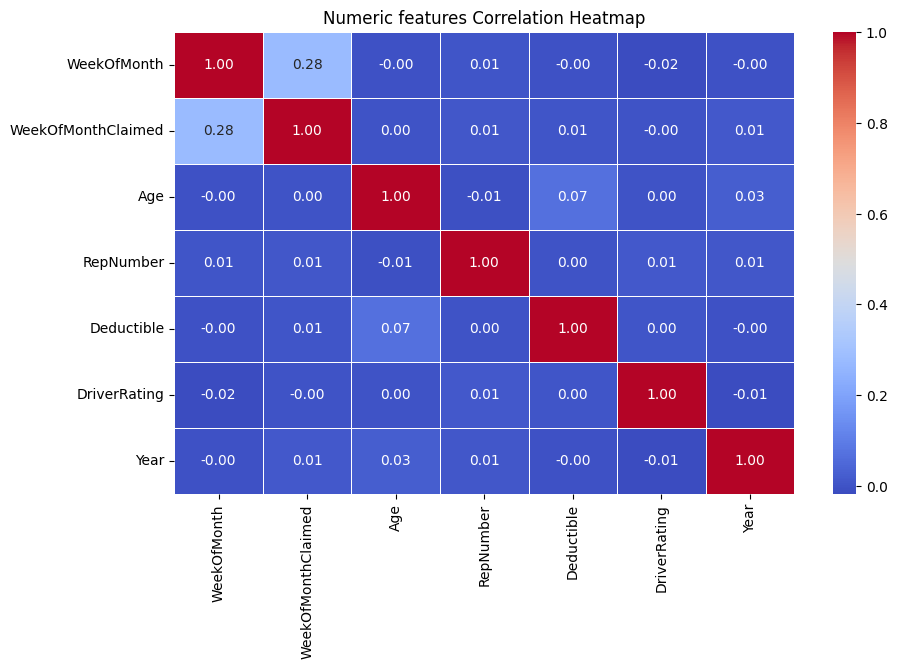

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Numeric features Correlation Heatmap")
plt.show()

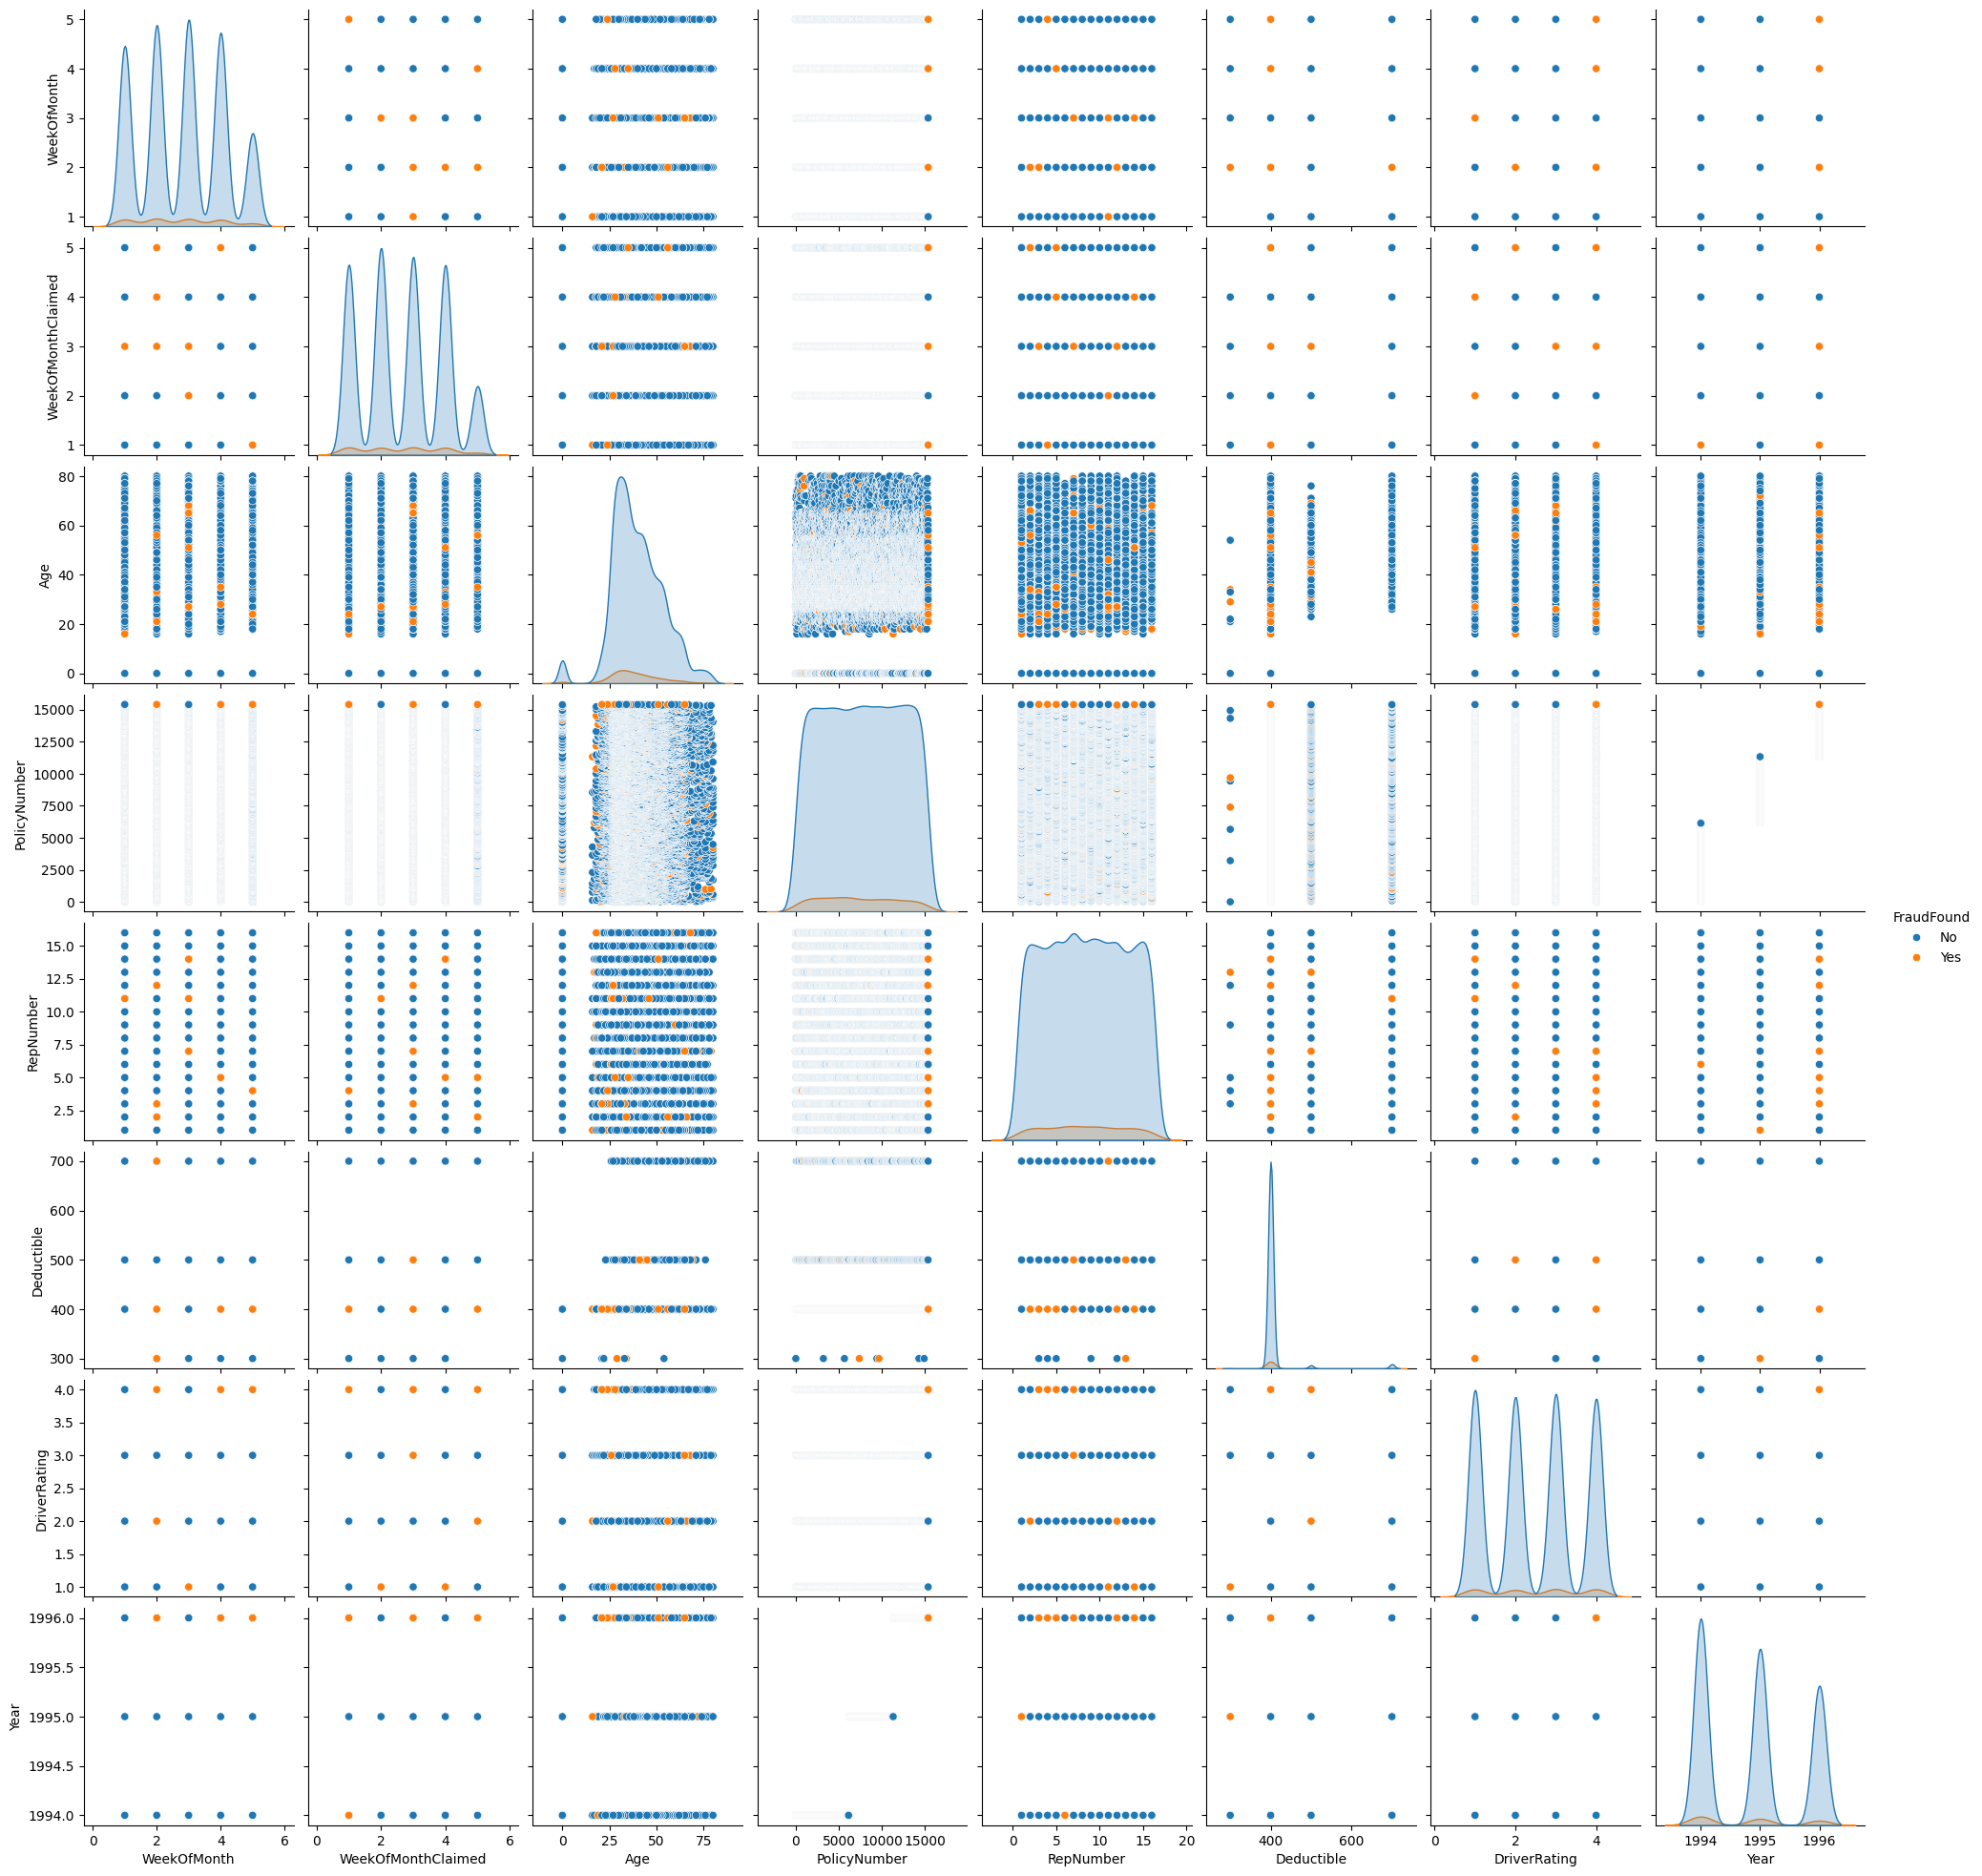

In [15]:
sns.pairplot(dataset, hue="FraudFound")
plt.show()



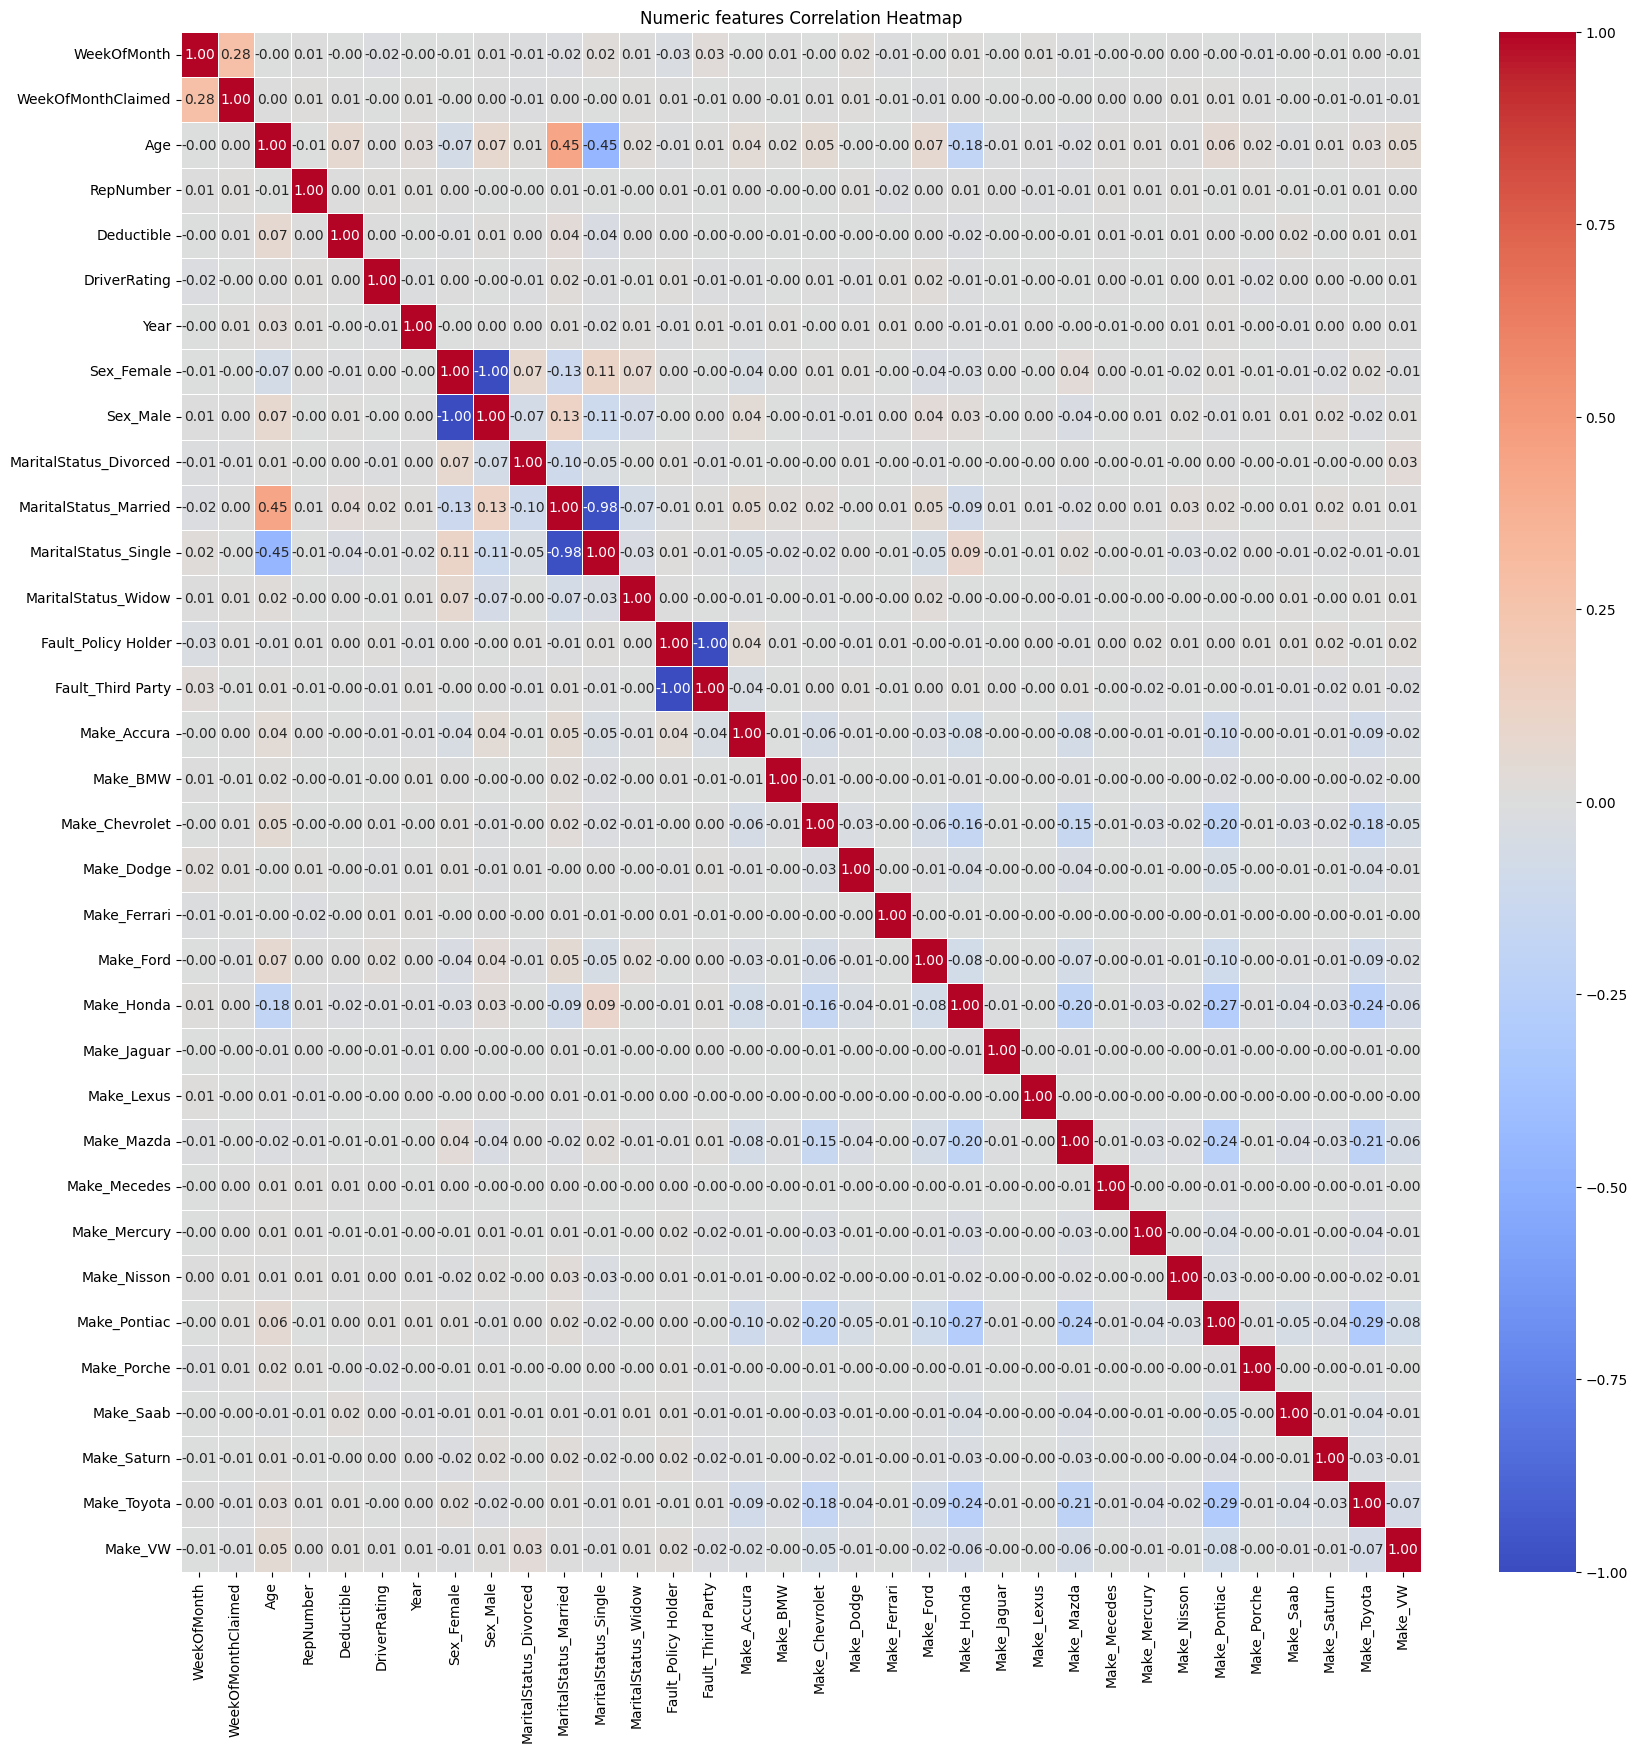

In [21]:
dataset_encoded = pd.get_dummies(dataset, columns=['Sex', 'MaritalStatus', 'Fault','Make' ])

# Convert all boolean columns to integer format
bool_cols = dataset_encoded.select_dtypes(include=["bool"]).columns
dataset_encoded[bool_cols] = dataset_encoded[bool_cols].astype(int)


plt.figure(figsize=(20, 20))
sns.heatmap(dataset_encoded.select_dtypes(include=['number','float64','int64']).drop(columns=['PolicyNumber']).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Numeric features Correlation Heatmap")
plt.show()

In [22]:
# Plot Time Series (if Date/Time data exists)
# NOTE: Date/Time data does not exist in this dataset
print("NOTE: Date/Time data does not exist in this dataset")


NOTE: Date/Time data does not exist in this dataset


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

#### Figure 3.19 Remove gridlines (page 93)

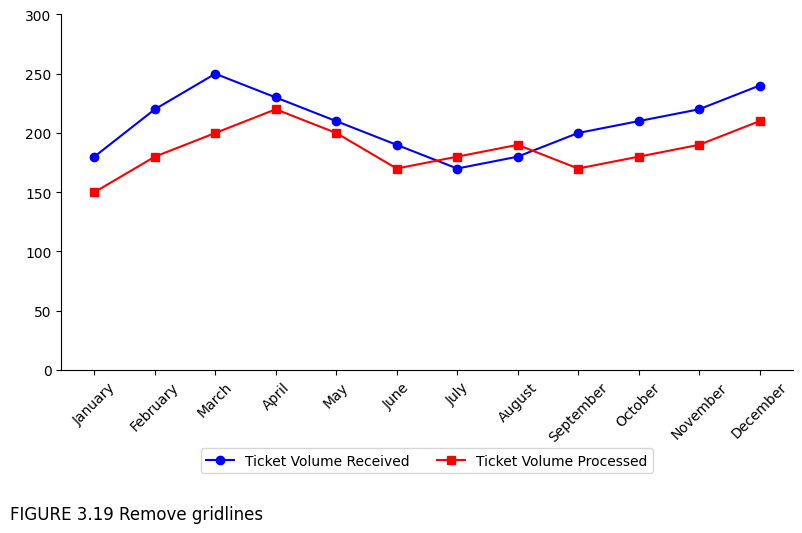

In [ ]:

# Sample data
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

ticket_volume_received = [180, 220, 250, 230, 210, 190, 170, 180, 200, 210, 220, 240]
ticket_volume_processed = [150, 180, 200, 220, 200, 170, 180, 190, 170, 180, 190, 210]

# Create plot
plt.figure(figsize=(8, 5))

# Plot each series with distinct markers and colors
plt.plot(months, ticket_volume_received, color='blue', marker='o', label='Ticket Volume Received')
plt.plot(months, ticket_volume_processed, color='red', marker='s', label='Ticket Volume Processed')

# Remove gridlines
plt.grid(False)

# Optionally remove top and right spines for a cleaner look
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Adjust y-axis range to roughly match the example
plt.ylim(0, 300)

# Add legend, labels, and title
plt.legend(
    loc='upper center',       # position in the figure
    bbox_to_anchor=(0.5, -0.2),  # adjust X, Y position relative to the axes
    ncol=2                   # number of columns in the legend
)

plt.xticks(rotation=45)

plt.figtext(0, -0.05, "FIGURE 3.19 Remove gridlines", ha='left', fontsize=12)
# Display
plt.tight_layout()
plt.show()
